# Implementation of multivariate linear regression using gradient descent
- Load data with scikitlearn
- Gradient Descent

In [1]:
from sklearn.datasets import load_boston
import numpy as np
boston = load_boston()
X = boston.data # house features
Y = boston.target # house cost
crime = X[:-1,0] 
nox = X[:-1,4]
rooms = X[:-1,5]

# training data
train_x = np.array([crime,nox,rooms])
train_x = np.transpose(train_x)
train_y = Y[0:-1]

In [2]:
from collections import OrderedDict
import pandas as pd
# crime per capita, nitric oxide concentration levels, avg. num of rooms.
boston_data = OrderedDict({'Crime ': crime,
             'NOX ': nox,
             'Avg. Rooms ': rooms, 'Price ': train_y*1000})
df = pd.DataFrame(boston_data)

In [3]:
df

,Crime,NOX,Avg. Rooms,Price
0,0.00632,0.538,6.575,24000.0
1,0.02731,0.469,6.421,21600.0
2,0.02729,0.469,7.185,34700.0
3,0.03237,0.458,6.998,33400.0
4,0.06905,0.458,7.147,36200.0
5,0.02985,0.458,6.430,28700.0
6,0.08829,0.524,6.012,22900.0
7,0.14455,0.524,6.172,27100.0
8,0.21124,0.524,5.631,16500.0
9,0.17004,0.524,6.004,18900.0


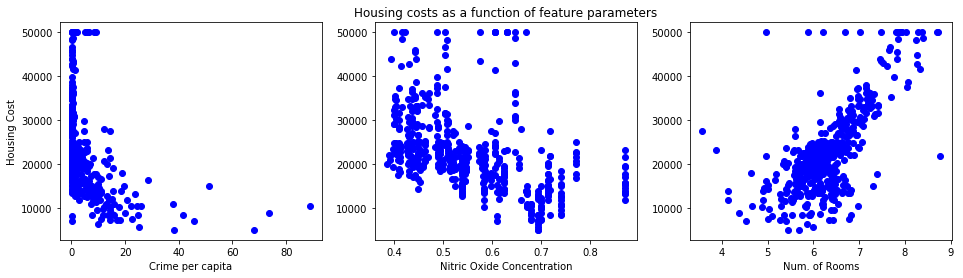

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(16,4))
ax1.set_ylabel('Housing Cost')
ax1.set_xlabel('Crime per capita')
ax2.set_xlabel('Nitric Oxide Concentration')
ax3.set_xlabel('Num. of Rooms')
ax2.set_title('Housing costs as a function of feature parameters')
ax1.plot(crime,train_y*1000,'bo') 
ax2.plot(nox,train_y*1000,'bo')
ax3.plot(rooms,train_y*1000,'bo') 
plt.show()

In [5]:
def update_w_and_b(x,y,w,b,alpha):
    num_examples = x.shape[0]                          # [505,3]
    num_feat = x.shape[1]                              # [505]
    
    # obtain gradients
    dl_dw = np.zeros((num_examples,num_feat)) 
    dl_db = np.zeros(num_examples)            
    for i in range(num_examples):
        for j in range(num_feat): 
            dl_dw[i,j] += -2*x[i,j]*(y[i]-(w[i,j]*x[i,j]+b[i])) 
            dl_db[i] += -2*(y[i]-(w[i,j]*x[i,j]+b[i]))  
    
    # update weights and bias
    for i in range(num_examples):
        for j in range(num_feat):
            w[i,j] = w[i,j] - (1/float(num_feat))*alpha*dl_dw[i,j]  
        b[i] = b[i] - (1/float(num_feat))*alpha*dl_db[i]
    return w,b

def hypothesis(x,w,b):
    n = x.shape[0]
    h = 0
    for i in range(n):
        h += x[i]*w[i]
    return(h+b)
        
def avg_loss(x,y,w,b): 
    num_examples = x.shape[0]
    loss = 0
    for i in range(num_examples):
        h = hypothesis(x[i,],w[i,],b[i])
        loss += (1/(2*num_examples))*(h-y[i])**2 # MSE loss function
        return(loss,h)

def train(x,y,w,b,alpha,epochs):
    for epoch in range(epochs+1):
        w,b= update_w_and_b(x,y,w,b,alpha)
        if epoch % 50 == 0:
            loss, h = avg_loss(x,y,w,b)
            print('epoch: %s, loss: %s' %(epoch,loss)) 
            plt.xlabel('epoch')
            plt.ylabel('loss')
            plt.plot(epoch, loss,'bo')
    plt.show()
    return(w,b)

epoch: 0, loss: 0.5667651443384116
epoch: 50, loss: 0.41487415824007184
epoch: 100, loss: 0.30278228418461495
epoch: 150, loss: 0.2201878810393508
epoch: 200, loss: 0.15944027665910213
epoch: 250, loss: 0.11485952458249782
epoch: 300, loss: 0.08223047056882521
epoch: 350, loss: 0.0584264924464586
epoch: 400, loss: 0.04112970348909059
epoch: 450, loss: 0.02862291150952274
epoch: 500, loss: 0.019634951634674134
epoch: 550, loss: 0.013225717285912406
epoch: 600, loss: 0.008700715669041209
epoch: 650, loss: 0.005547579442665596
epoch: 700, loss: 0.003388904624235108
epoch: 750, loss: 0.001947226928416921
epoch: 800, loss: 0.0010190216370546457
epoch: 850, loss: 0.0004554102870530971
epoch: 900, loss: 0.00014785125486062772
epoch: 950, loss: 1.7533037352666268e-05
epoch: 1000, loss: 7.517609872284044e-06


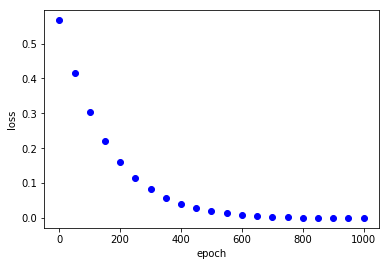

In [6]:
weights = np.zeros(train_x.shape)
biases = np.zeros(505)
w,b = train(train_x,train_y,weights,biases,0.0001,1000)

In [7]:
test_x = np.array([X[:-1,0],X[:-1,4],X[:-1,5]])
test_x = np.transpose(test_x)
test_y = np.array(Y[-1]*1000)
h = sum(test_x.dot(w.transpose())+b) 
hypothesis = sum(h)/len(h)
print('prediction house cost: %s, true house cost: %s' %(hypothesis,test_y))
# predict some more houses

prediction house cost: 12563.757190909771, true house cost: 11900.0
